In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_boston, load_breast_cancer
from sklearn.model_selection import KFold
from sklearn import preprocessing, svm, metrics as m
from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.linear_model import LinearRegression, SGDRegressor, LogisticRegression

# 1. Use K-Fold Cross Validation com k = 5 para resolver os seguintes problemas de machine learning: 

Regressão

    Dataset: boston house-prices dataset
    
    Aplicar Standardization nas features.
    
    Comparar os resultados dos seguintes algoritmos: Gradient Descent, Linear Regression, kNN, Naive Bayes, SVM
    
    Usar as seguintes métricas: RMSE, MAE
    
    Escolher a melhor técnica e criar um modelo final usando todo o dataset para treinar o modelo.

In [2]:
X_boston, y_boston = load_boston(return_X_y=True)

#print(X_boston)
#print(y_boston)

train = KFold(n_splits=5, shuffle=True, random_state=42)
train.get_n_splits(X_boston, y_boston)

#print(train)

for train_index, test_index in train.split(X_boston, y_boston):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X_boston[train_index], X_boston[test_index]
    y_train, y_test = y_boston[train_index], y_boston[test_index]
    
std_scale = preprocessing.StandardScaler().fit(X_train, y_train)

X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

In [3]:
# Gradient Descent
sgd = SGDRegressor().fit(X_train_std, y_train)
y_pred_sgd = sgd.predict(X_test_std)
mse_sgd = m.mean_squared_error(y_test, y_pred_sgd)

# Linear Regression
lr = LinearRegression().fit(X_train_std, y_train)
y_pred_lr = lr.predict(X_test_std)
mse_lr = m.mean_squared_error(y_test, y_pred_lr)

#KNN Regressor
knnR = KNeighborsRegressor().fit(X_train_std, y_train)
y_pred_knnR = knnR.predict(X_test_std)
mse_knnR = m.mean_squared_error(y_test, y_pred_knnR)

#Naive Bayes
#gnb = GaussianNB().fit(X_train_std, y_train)

#SVM
svr = svm.SVR(kernel='linear', C=1, gamma='auto').fit(X_train_std, y_train)
y_pred_svr = svr.predict(X_test_std)
mse_svr = m.mean_squared_error(y_test, y_pred_svr)

#print("Gradient Descent: MSE = {} and RMSE = {}".format(mse_sgd, mse_sgd ** 1/2))
#print("Linear Regression: MSE = {} and RMSE = {}".format(mse_lr, mse_lr ** 1/2))
#print("KNN Regressor: MSE = {} and RMSE = {}".format(mse_knnR, mse_knnR ** 1/2))
#print("E-S V Regression: MSE = {} and RMSE = {}".format(mse_svr, mse_svr ** 1/2))

In [4]:
class_names = ['SGD','LR','KnnR','SVR']
class_ = [mse_sgd, mse_lr, mse_knnR, mse_svr]
class_1 = [mse_sgd ** 1/2, mse_lr ** 1/2, mse_knnR ** 1/2, mse_svr ** 1/2]
for i in range(0,len(class_names)):
    print(class_names[i] + ': MSE = ' + str(class_[i]) + ' - RMSE = ' + str(class_1[i]))

SGD: MSE = 21.5973169303 - RMSE = 10.7986584652
LR: MSE = 22.5002427017 - RMSE = 11.2501213509
KnnR: MSE = 22.2731841584 - RMSE = 11.1365920792
SVR: MSE = 23.0067869605 - RMSE = 11.5033934803


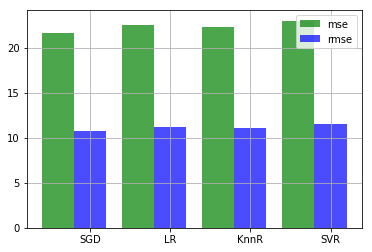

In [5]:
grupos = len(class_names)
indice = np.arange(grupos)
bar_larg = 0.4
transp = 0.7

plt.grid()
plt.bar(indice, class_, bar_larg, alpha=transp, color='green', label='mse')
plt.bar(indice + bar_larg, class_1, bar_larg, alpha=transp, color='blue', label='rmse')

plt.xticks(indice + bar_larg, class_names)
plt.legend()

In [6]:
# COMO SGD FOI MELHOR
SGD_final = SGDRegressor().fit(X_boston, y_boston)
SGD_final

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

Classificação

    Dataset: breast cancer wisconsin dataset
    
    Aplicar Normalization nas features.
    
    Comparar os resultados dos seguintes algoritmos: Logistic Regression, kNN, Naive Bayes, SVM
    
    Mostrar a matriz de confusão
    
    Usar as seguintes métricas: Accuracy, Precision, Recall, F1-Measure, AOC
    
    Plotar curva ROC dos diferentes algoritmos.
    
    Escolher a melhor técnica e criar um modelo final usando todo o dataset para treinar o modelo.

In [7]:
X_cancer, y_cancer = load_breast_cancer(return_X_y=True)

#print(X_cancer)
#print(y_cancer)

train = KFold(n_splits=5, shuffle=True, random_state=42)
train.get_n_splits(X_cancer, y_cancer)

for train_index, test_index in train.split(X_cancer, y_cancer):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train2, X_test2 = X_cancer[train_index], X_cancer[test_index]
    y_train2, y_test2 = y_cancer[train_index], y_cancer[test_index]
    
norm_scale = preprocessing.MinMaxScaler().fit(X_train2, y_train2)

X_train2_norm = norm_scale.transform(X_train2)
X_test2_norm = norm_scale.transform(X_test2)

In [8]:
# PEGANADO O VETOR DE PROBABILIDADES DAS CLASSES DO Y

teste = np.unique(y_cancer, return_counts=True)
prob_classes = [ teste[1][i] / np.sum(teste[1]) for i in range(len(teste[0])) ]
print(prob_classes)

[0.37258347978910367, 0.62741652021089633]


In [9]:
# Logistic Regression
logR = LogisticRegression().fit(X_train2_norm, y_train2)
y_pred_logR = logR.predict(X_test2_norm)
acc_logR = m.accuracy_score(y_test2, y_pred_logR)
pre_logR = m.precision_score(y_test2, y_pred_logR)
rec_logR = m.recall_score(y_test2, y_pred_logR)
f1_logR = m.f1_score(y_test2, y_pred_logR)
print("Logistic Regression")
print(m.confusion_matrix(y_test2, y_pred_logR))

#KNN Classifier
knnC = KNeighborsClassifier().fit(X_train2_norm, y_train2)
y_pred_knnC = knnC.predict(X_test2_norm)
acc_knnC = m.accuracy_score(y_test2, y_pred_knnC)
pre_knnC = m.precision_score(y_test2, y_pred_knnC)
rec_knnC = m.recall_score(y_test2, y_pred_knnC)
f1_knnC = m.f1_score(y_test2, y_pred_knnC)
print("KNN Classifier")
print(m.confusion_matrix(y_test2, y_pred_knnC))

#Naive Bayes
gnb = GaussianNB().fit(X_train2_norm, y_train2)
y_pred_gnb = gnb.predict(X_test2_norm)
acc_gnb = m.accuracy_score(y_test2, y_pred_gnb)
pre_gnb = m.precision_score(y_test2, y_pred_gnb)
rec_gnb = m.recall_score(y_test2, y_pred_gnb)
f1_gnb = m.f1_score(y_test2, y_pred_gnb)
print("Naive Bayes")
print(m.confusion_matrix(y_test2, y_pred_gnb))

#SVM
svc = svm.SVC(kernel='linear', C=1, gamma='auto').fit(X_train2_norm, y_train2)
y_pred_svc = svc.predict(X_test2_norm)
acc_svc = m.accuracy_score(y_test2, y_pred_svc)
pre_svc = m.precision_score(y_test2, y_pred_svc)
rec_svc = m.recall_score(y_test2, y_pred_svc)
f1_svc = m.f1_score(y_test2, y_pred_svc)
print("C-Support Vector Classification")
print(m.confusion_matrix(y_test2, y_pred_svc))

Logistic Regression
[[39  7]
 [ 0 67]]
KNN Classifier
[[40  6]
 [ 1 66]]
Naive Bayes
[[40  6]
 [ 2 65]]
C-Support Vector Classification
[[43  3]
 [ 0 67]]


In [10]:
class_names2 = ['LogR','KnnC','GNB','SVC']
class2_ = [acc_logR, acc_knnC, acc_gnb, acc_svc]
class2_1 = [pre_logR, pre_knnC, pre_gnb, pre_svc]
class2_2 = [rec_logR, rec_knnC, rec_gnb, rec_svc]
class2_3 = [f1_logR, f1_knnC, f1_gnb, f1_svc]
for i in range(len(class_names2)):
    print(class_names2[i] + ': ACC = ' + str(class2_[i]) + ' - PRE = ' + str(class2_1[i])  
          + ' - REC = ' + str(class2_2[i]) + ' - F1 = ' + str(class2_3[i]))

LogR: ACC = 0.938053097345 - PRE = 0.905405405405 - REC = 1.0 - F1 = 0.950354609929
KnnC: ACC = 0.938053097345 - PRE = 0.916666666667 - REC = 0.985074626866 - F1 = 0.94964028777
GNB: ACC = 0.929203539823 - PRE = 0.915492957746 - REC = 0.970149253731 - F1 = 0.942028985507
SVC: ACC = 0.973451327434 - PRE = 0.957142857143 - REC = 1.0 - F1 = 0.978102189781


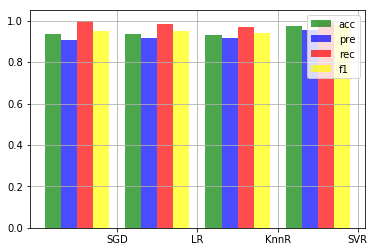

In [11]:
grupos = len(class_names2)
indice = np.arange(grupos)
bar_larg = 0.2
transp = 0.7

plt.grid()
plt.bar(indice, class2_, bar_larg, alpha=transp, color='green', label='acc')
indice = indice + bar_larg
plt.bar(indice, class2_1, bar_larg, alpha=transp, color='blue', label='pre')
indice = indice + bar_larg
plt.bar(indice, class2_2, bar_larg, alpha=transp, color='red', label='rec')
indice = indice + bar_larg
plt.bar(indice, class2_3, bar_larg, alpha=transp, color='yellow', label='f1')

plt.xticks(indice + bar_larg, class_names)
plt.legend()

In [12]:
# Plotar curva ROC dos diferentes algoritmos

In [13]:
svc_final = svm.SVC().fit(X_cancer, y_cancer)
svc_final

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Preencha seus resultados de RMSE (para o problema de regressão) e Accuracy (para o problema de classificação) na seguinte planilha online (https://docs.google.com/spreadsheets/d/1Zkm8q3uvkL-vCpiG2M-_s-K3j_3XK8zFLDZrtTqPImk/edit#gid=0). 

Nossa primeira competiçãozinha interna!!! Tentem melhorar os resultados.